# TOPSIS METHOD

TOPSIS stands by Technique for Order Preference by Similarity to Ideal Solution. TOPSIS originated in the 1980s as a multi-criteria decision making method. TOPSIS chooses the alternative of shortest Euclidean distance from the ideal solution, and farthest distance from the negative-ideal solution, but it does not consider the relative importance of these distances.

We are going to show a basic example on how to rank countries of Europe based on several features. The dataset has been obtained from Kaggle:
https://www.kaggle.com/fernandol/countries-of-the-world/data

Topsis Explanation: http://www.faez.ir/CourseFile/TOPSIS.pdf

In [50]:
# Import libraries

import pandas as pd
import numpy as np

In [51]:
# Reading the dataset from the same dir

df_countries = pd.read_csv('Countries-World.csv')
df_countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [52]:
print(df_countries.shape)

(227, 20)


In [53]:
df_countries = df_countries.replace(",",".")

First of all, we are going to do a data cleaning

In [54]:
# Delete spaces in string columns

df_countries['Country'] = df_countries['Country'].str.replace(" ", "")
df_countries['Region'] = df_countries['Region'].str.replace(" ", "")

In [55]:
# Check rows with Nan values
df_nan_values=df_countries[df_countries.isna().any(axis=1)]
df_nan_values.shape

(48, 20)

We observe we have 48 countries with at least one Nan value, but before dropping them, let's continue the analysis.

In [56]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [57]:
# Let's convert number columns into float type. First we need to replace the ',' by '.'

for i in df_countries.columns:
    df_countries[i] = df_countries[i].astype('str')
    df_countries[i] = df_countries[i].str.replace(",",".")

df_countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA(EX.NEAREAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38
1,Albania,EASTERNEUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERNAFRICA,32930091,2381740,13.8,0.04,-0.39,31,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.6,0.298
3,AmericanSamoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10,15,75,2,22.46,3.27,nan,nan,nan
4,Andorra,WESTERNEUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.0,497.2,2.22,0,97.78,3,8.71,6.25,nan,nan,nan


In [58]:
# Let's convert number columns into float type

df_countries = df_countries.astype({'Population': 'float64', 'Area (sq. mi.)': 'float64', 'Pop. Density (per sq. mi.)': 'float64', 'Coastline (coast/area ratio)': 'float64', 'Net migration': 'float64', 'Infant mortality (per 1000 births)': 'float64', 'GDP ($ per capita)': 'float64', 'Literacy (%)': 'float64', 'Phones (per 1000)': 'float64', 'Arable (%)': 'float64', 'Crops (%)': 'float64', 'Other (%)': 'float64', 'Climate': 'float64', 'Birthrate': 'float64', 'Deathrate': 'float64', 'Agriculture': 'float64', 'Industry': 'float64', 'Service': 'float64'})
df_countries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    float64
 3   Area (sq. mi.)                      227 non-null    float64
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [59]:
# Drop duplicates

df_countries.drop_duplicates(keep=False,inplace=True)
df_countries.shape

(227, 20)

From a first basic analysis, we can observe there are 227 countries and 20 features to describe all of them. As 227 countries are a lot, we have to focus on one region, so we are going to check how many countries per region we have.

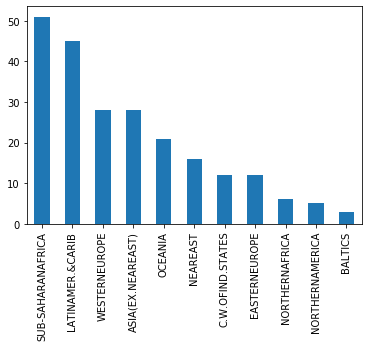

In [60]:
df_countries['Region'].value_counts().plot.bar()

In [110]:
# Analyzing the Regions: EASTERNEUROPE and BALTICS

df_countries_east = df_countries[(df_countries['Region']=='EASTERNEUROPE') | (df_countries['Region']=='BALTICS')]
df_countries_east

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
1,Albania,EASTERNEUROPE,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
25,Bosnia&Herzegovina,EASTERNEUROPE,4498976.0,51129.0,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
30,Bulgaria,EASTERNEUROPE,7385367.0,110910.0,66.6,0.32,-4.58,20.55,7600.0,98.6,336.3,40.02,1.92,58.06,3.0,9.65,14.27,0.093,0.304,0.603
50,Croatia,EASTERNEUROPE,4494749.0,56542.0,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
53,CzechRepublic,EASTERNEUROPE,10235455.0,78866.0,129.8,0.00,0.97,3.93,15700.0,99.9,314.3,39.80,3.05,57.15,3.0,9.02,10.59,0.034,0.393,0.573
64,Estonia,BALTICS,1324333.0,45226.0,29.3,8.39,-3.16,7.87,12300.0,99.8,333.8,16.04,0.45,83.51,3.0,10.04,13.25,0.040,0.294,0.666
92,Hungary,EASTERNEUROPE,9981334.0,93030.0,107.3,0.00,0.86,8.57,13900.0,99.4,336.2,50.09,2.06,47.85,3.0,9.72,13.11,0.037,0.312,0.651
114,Latvia,BALTICS,2274735.0,64589.0,35.2,0.82,-2.23,9.55,10200.0,99.8,321.4,29.67,0.47,69.86,3.0,9.24,13.66,0.040,0.261,0.699
120,Lithuania,BALTICS,3585906.0,65200.0,55.0,0.14,-0.71,6.89,11400.0,99.6,223.4,45.22,0.91,53.87,NaN,8.75,10.98,0.055,0.325,0.620
123,Macedonia,EASTERNEUROPE,2050554.0,25333.0,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3.0,12.02,8.77,0.118,0.319,0.563


In [111]:
# Choosing the features: Pop Density, Coastline, Net Migration, Infant mortality, GDP, Literacy and Deathrate

df_countries_east = df_countries_east.drop(['Region', 'Population', 'Area (sq. mi.)','Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate','Agriculture', 'Industry', 'Service'], axis = 1)
df_countries_east

,Country,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Deathrate
1,Albania,124.6,1.26,-4.93,21.52,4500.0,86.5,5.22
25,Bosnia&Herzegovina,88.0,0.04,0.31,21.05,6100.0,NaN,8.27
30,Bulgaria,66.6,0.32,-4.58,20.55,7600.0,98.6,14.27
50,Croatia,79.5,10.32,1.58,6.84,10600.0,98.5,11.48
53,CzechRepublic,129.8,0.00,0.97,3.93,15700.0,99.9,10.59
64,Estonia,29.3,8.39,-3.16,7.87,12300.0,99.8,13.25
92,Hungary,107.3,0.00,0.86,8.57,13900.0,99.4,13.11
114,Latvia,35.2,0.82,-2.23,9.55,10200.0,99.8,13.66
120,Lithuania,55.0,0.14,-0.71,6.89,11400.0,99.6,10.98
123,Macedonia,80.9,0.00,-1.45,10.09,6700.0,NaN,8.77


In [112]:
# Replace Nan values with the avg

df_countries_east=df_countries_east.fillna(df_countries_east.mean())
df_countries_east

,Country,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Deathrate
1,Albania,124.6,1.26,-4.93,21.52,4500.0,86.50,5.220000
25,Bosnia&Herzegovina,88.0,0.04,0.31,21.05,6100.0,97.75,8.270000
30,Bulgaria,66.6,0.32,-4.58,20.55,7600.0,98.60,14.270000
50,Croatia,79.5,10.32,1.58,6.84,10600.0,98.50,11.480000
53,CzechRepublic,129.8,0.00,0.97,3.93,15700.0,99.90,10.590000
64,Estonia,29.3,8.39,-3.16,7.87,12300.0,99.80,13.250000
92,Hungary,107.3,0.00,0.86,8.57,13900.0,99.40,13.110000
114,Latvia,35.2,0.82,-2.23,9.55,10200.0,99.80,13.660000
120,Lithuania,55.0,0.14,-0.71,6.89,11400.0,99.60,10.980000
123,Macedonia,80.9,0.00,-1.45,10.09,6700.0,97.75,8.770000


In [113]:
df_countries_east.index = df_countries_east['Country']
df_countries_east=df_countries_east.drop('Country', axis=1)
df_countries_east.head()

,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Deathrate
Country,,,,,,,
Albania,124.6,1.26,-4.93,21.52,4500.0,86.50,5.22
Bosnia&Herzegovina,88.0,0.04,0.31,21.05,6100.0,97.75,8.27
Bulgaria,66.6,0.32,-4.58,20.55,7600.0,98.60,14.27
Croatia,79.5,10.32,1.58,6.84,10600.0,98.50,11.48
CzechRepublic,129.8,0.00,0.97,3.93,15700.0,99.90,10.59


In [133]:
df_countries_east.shape

(15, 7)

Let´s start with the topsis method

In [1]:
from topsis import topsis

In [236]:
# We need the data, the weights to each feature, and the criteria to decide if the feature is benefit or cost.

data = df_countries_east.values
weights = [1,1,1,1,1,1,1]
criteria = [0,1,1,0,1,1,0]

In [237]:
decision = topsis(data, weights, criteria)

In [238]:
decision

Best alternative
a[3]: [7.950e+01 1.032e+01 1.580e+00 6.840e+00 1.060e+04 9.850e+01 1.148e+01]

In [239]:
rank = decision.C
print(rank)

[0.18024405 0.42039045 0.17822971 0.8043432  0.51479113 0.56715043
 0.49419411 0.38498131 0.45281724 0.37852835 0.43560778 0.38000341
 0.34260456 0.48117955 0.54128034]


In [240]:
rank_dict = dict(zip(df_countries_east.index, rank))

In [241]:
df_rank = pd.DataFrame(rank_dict.items(), columns=['Country', 'Ranking'])
df_rank.sort_values(by=['Ranking'], ascending = False)

,Country,Ranking
3,Croatia,0.804343
5,Estonia,0.567150
14,Slovenia,0.541280
4,CzechRepublic,0.514791
6,Hungary,0.494194
13,Slovakia,0.481180
8,Lithuania,0.452817
10,Poland,0.435608
1,Bosnia&Herzegovina,0.420390
7,Latvia,0.384981
